## IMPORT LIBRARIES AND DATASET

In [42]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
from textblob import TextBlob 

df = pd.read_csv("C:\\Users\\Aishwarya\\Downloads\\archive (2)\\netflix_dataset.csv")

## STRUCTURE OF DATASET

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          8807 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [185]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
df.shape

(8807, 12)

## To find the missing  data

In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Handling missing data

In [20]:
df.fillna({'director': 'Unknown', 'cast': 'Unknown', 'country': 'Unknown'}, inplace=True)
df.fillna({
    'date_added': df['date_added'].mode()[0],
    'rating': df['rating'].mode()[0],
    'duration': df['duration'].mode()[0]
}, inplace=True)


In [22]:
df.isnull().sum()   # all the missing data has been handled

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## To check the number of duplicates

In [26]:
df.duplicated().sum()     #cleaning of data is completed

0

## Checking content available in Dataset

In [29]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Taking the count of ratings available

In [37]:
x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3211
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


## Creating the Piechart based on content rating

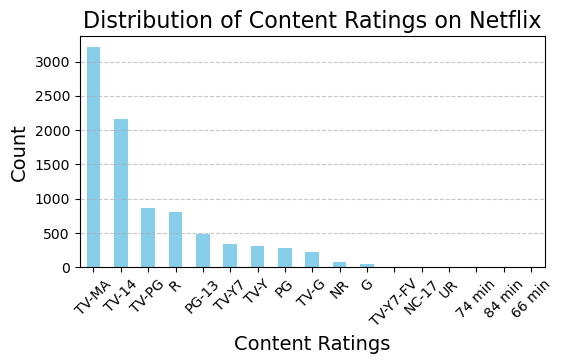

In [87]:
rating_counts = df['rating'].value_counts()

# Create a bar chart based on content ratings
plt.figure(figsize=(6, 3))
rating_counts.plot.bar(color='skyblue')

plt.title('Distribution of Content Ratings on Netflix', fontsize=16)
plt.xlabel('Content Ratings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Analyzing the top 5 Actors on Netflix

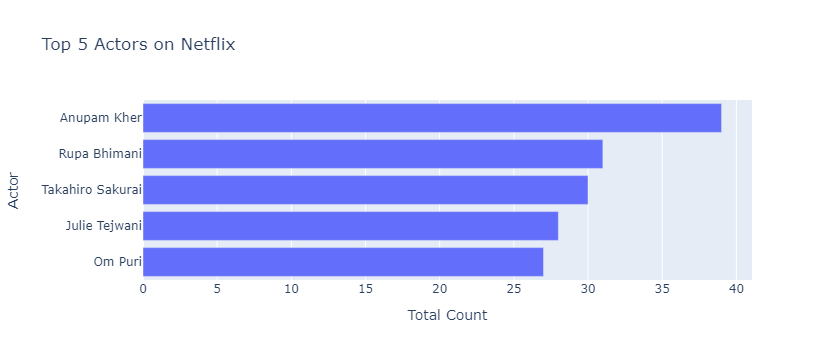

In [94]:
cast_df = df['cast'].fillna('No cast specified').str.split(',', expand=True).stack().to_frame(name='Actor')

actors = cast_df.groupby('Actor').size().reset_index(name='Total Count')
top5Actors = actors[actors.Actor != 'No cast specified'].nlargest(5, 'Total Count')

barChart = px.bar(top5Actors.sort_values('Total Count'), x='Total Count', y='Actor', title='Top 5 Actors on Netflix')
barChart.show()

## Analyzing the content produced on netflix based on years

In [101]:
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')
print(df2)

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


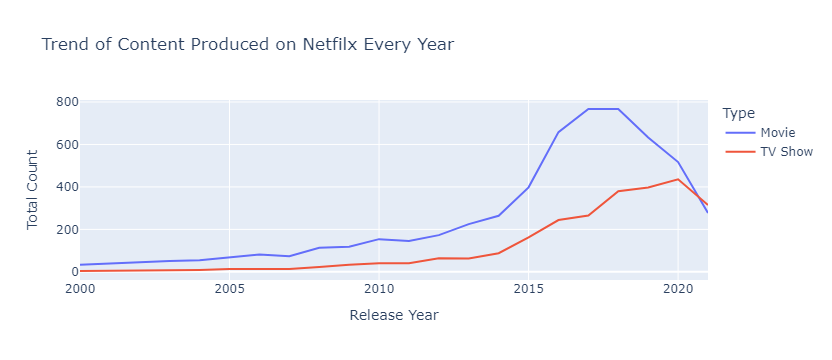

In [103]:
df2 = df2[df2['Release Year']>=2000]
graph = px.line(df2, x = "Release Year", y="Total Count", color = "Type", title = "Trend of Content Produced on Netfilx Every Year")
graph.show()

## Sentiment Analysis of Netflix Content

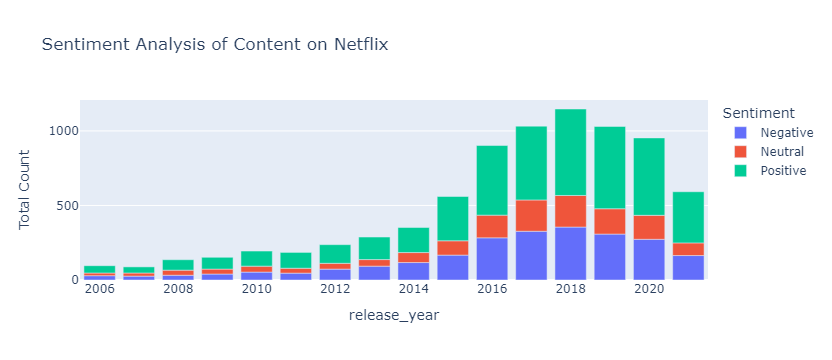

In [114]:
df3 = df[['release_year', 'description']].copy()  
df3.loc[:, 'Sentiment'] = df3['description'].apply(lambda d: 'Neutral' if TextBlob(d).sentiment.polarity == 0 
                                                     else 'Positive' if TextBlob(d).sentiment.polarity > 0 
                                                     else 'Negative')
df3 = df3.groupby(['release_year', 'Sentiment']).size().reset_index(name='Total Count')
df3 = df3[df3['release_year'] > 2005]
barGraph = px.bar(df3, x="release_year", y="Total Count", color="Sentiment", title="Sentiment Analysis of Content on Netflix")
barGraph.show()

 ## Total number of content types produced each year

In [124]:
total_content_by_year = df.groupby('release_year').size().reset_index(name='Total Content')
print(total_content_by_year)

    release_year  Total Content
0           1925              1
1           1942              2
2           1943              3
3           1944              3
4           1945              4
..           ...            ...
69          2017           1032
70          2018           1147
71          2019           1030
72          2020            953
73          2021            592

[74 rows x 2 columns]


## Distribution of content types (movies vs TV shows)

      Type  Total Count
0    Movie         6131
1  TV Show         2676


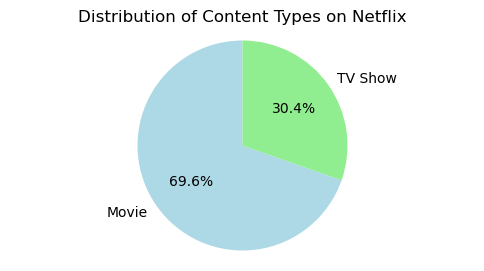

In [139]:
content_distribution = df['type'].value_counts().reset_index()
content_distribution.columns = ['Type', 'Total Count']
print(content_distribution)

content_distribution = df['type'].value_counts()
plt.figure(figsize=(6, 3))
plt.pie(content_distribution, labels=content_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Content Types on Netflix')
plt.axis('equal')  
plt.show()

## Which type of content has seen the most growth over the years?

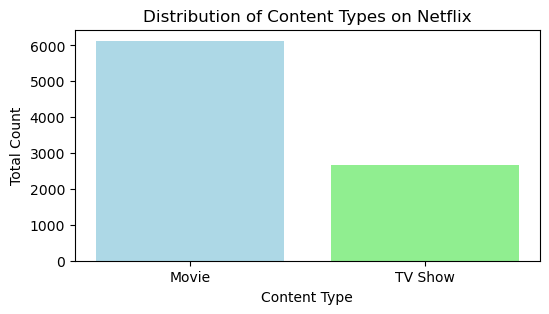

In [148]:
plt.figure(figsize=(6, 3))
plt.bar(content_distribution.index, content_distribution.values, color=['lightblue', 'lightgreen'])
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Total Count')
plt.show()

## The top 5 years with the most content

In [159]:
top_years = df['release_year'].value_counts().head(5).reset_index()
top_years.columns = ['Release Year', 'Total Content']
top_years

,Release Year,Total Content
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902


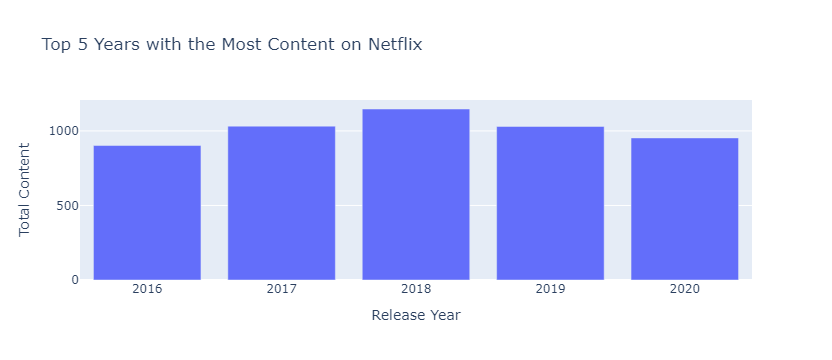

In [161]:
barChart = px.bar(top_years, x='Release Year', y='Total Content', title='Top 5 Years with the Most Content on Netflix')
barChart.show()